Sapa.com is one of the leading eCommerce platforms in Nigeria with millions of daily complete transactions. The goods and services on sapa.com cater for both the elite and the masses which makes it the first choice for almost everybody in Nigeria. Due to the COVID-19 pandemic that struck the entire world in all areas of living, the companies' daily complete transactions have dropped drastically to thousands.

The CEO, Mr Echoke in his recent actions to put the platform back to the top of the eCommerce platforms chain in the country has approved the use of Artificial intelligence in User Personality Analysis. The company has contracted to build an AI System with a special focus on recommender system development to build a robust intelligent model capable of recommending products and services to Users based on their activities on sapa.com.

I build a model capable of predicting users’ responses to marketing campaigns based on the features in the provided dataset by the sapa.com data engineer. The next phase of the project was highly dependent on the accuracy of my model as this was the foundation of what will constitute the features of the proposed recommender system development. 
Good luck!

It was a great task 

DATASETS

train.csv: contains the target. This is the dataset that you will use to train your model.
test.csv- resembles train.csv but without the target-related columns. This is the dataset on which you will apply your model to.
sample_submission.csv: shows the submission format for the project, with the ‘ID’ column mirroring that of test.csv and the ‘target’ column containing my predictions. The order of the rows does not matter, but the names of the ID must be correct.

    
VARIABLE DEFINITIONS

ID: Unique identifier for each User

Year_of_Birth: Year of birth

Education_Level: The highest level of education attained by the User

Marital_Status: Marital status

Disposable_Income: Yearly User’s household disposable income

No_of_Kids_in_home: total count of children in the user’s home

No_of_Teen_in_home: Number of teenagers in the User's household

Date_User: Date of User's enrollment with the company

Recency: Number of days since User's last purchase

Discounted_Purchases: Counts of purchases made by the user using coupons

WebPurchases: Counts of purchases made by the user through the company’s website

CatalogPurchases: Counts of purchases made by the user using a catalogue

StorePurchases: Counts of purchases made by the user directly in stores

Amount_on_Wines: Total amount user spent on wine and drinks within the last 3 years

Amount_on_Fruits: Total amount user spent on fruity food within the last 3 years

Amount_on_MeatProducts: Total amount user spent on meat products and livestock within the last 3 years

Amount_on_FishProducts: Total amount user spent on fish alone within the last 3 years

Amount_on_SweetProducts: Total amount user spent on sweets and chocolates within the last 3 years

Amount_on_GoldProds: Total amount user spent on golden products within the last 3 years

WebVisitsMonth: The number of times the user of visits to company’s website within the last 4 weeks

Cmp3Accepted: 1: Offer was accepted after the third campaign, 0 otherwise

Cmp4Accepted: 1: Offer was accepted after the fourth campaign, 0 otherwise

Cmp5Accepted: 1: Offer was accepted after the fifth campaign, 0 otherwise

Cmp1Accepted: 1: Offer was accepted after the first campaign, 0 otherwise

Cmp2Accepted: 1: Offer was accepted after the second campaign, 0 otherwise

Any_Complain: 1 if the user has a compliant history with the platform in the last 3 years, 0 otherwise

User_Response: 1: indicates the acceptance of offer and 0 otherwise

## Importing LIbraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm

import numpy.random as nr
import matplotlib.pyplot as plt

import scipy.stats as ss
import math


%matplotlib inline


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Loading Data

In [3]:
train_data= pd.read_csv('train.csv', parse_dates=['Date_Customer'])
test_data= pd.read_csv('test.csv',parse_dates=['Date_Customer'])
train_data.head(5)

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
0,ID_4A9AR6FQ,1955,Graduation,Divorced,77504.4,1,1,2014-06-22,56,2,1,1,4,71,3,16,0,6,20,3,0,0,0,0,0,0,0
1,ID_X28T3VEK,1958,Graduation,Together,56784.0,0,1,2013-01-08,17,6,5,1,8,205,22,111,50,15,19,6,0,0,0,0,0,0,0
2,ID_AWXARH57,1962,Graduation,Single,103714.8,0,0,2013-11-21,17,0,7,4,7,469,31,873,29,18,37,2,0,0,0,1,0,0,1
3,ID_FQVZHE81,1979,2n Cycle,Single,46311.6,1,0,2013-09-13,49,3,4,1,3,56,15,49,17,24,24,8,0,0,0,0,0,0,0
4,ID_QVLWGPRN,1959,Graduation,Married,87486.0,0,0,2014-01-21,59,1,3,7,9,412,117,445,181,165,203,1,0,0,0,1,0,0,0


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568 entries, 0 to 1567
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       1568 non-null   object        
 1   Year_of_Birth            1568 non-null   int64         
 2   Education_Level          1568 non-null   object        
 3   Marital_Status           1568 non-null   object        
 4   Disposable_Income        1552 non-null   float64       
 5   No_of_Kids_in_home       1568 non-null   int64         
 6   No_of_Teen_in_home       1568 non-null   int64         
 7   Date_Customer            1568 non-null   datetime64[ns]
 8   Recency                  1568 non-null   int64         
 9   Discounted_Purchases     1568 non-null   int64         
 10  WebPurchases             1568 non-null   int64         
 11  CatalogPurchases         1568 non-null   int64         
 12  StorePurchases           1568 non-

In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       672 non-null    object        
 1   Year_of_Birth            672 non-null    int64         
 2   Education_Level          672 non-null    object        
 3   Marital_Status           672 non-null    object        
 4   Disposable_Income        664 non-null    float64       
 5   No_of_Kids_in_home       672 non-null    int64         
 6   No_of_Teen_in_home       672 non-null    int64         
 7   Date_Customer            672 non-null    datetime64[ns]
 8   Recency                  672 non-null    int64         
 9   Discounted_Purchases     672 non-null    int64         
 10  WebPurchases             672 non-null    int64         
 11  CatalogPurchases         672 non-null    int64         
 12  StorePurchases           672 non-nul

In [6]:
train_data.dtypes

ID                                 object
Year_of_Birth                       int64
Education_Level                    object
Marital_Status                     object
Disposable_Income                 float64
No_of_Kids_in_home                  int64
No_of_Teen_in_home                  int64
Date_Customer              datetime64[ns]
Recency                             int64
Discounted_Purchases                int64
WebPurchases                        int64
CatalogPurchases                    int64
StorePurchases                      int64
Amount_on_Wines                     int64
Amount_on_Fruits                    int64
Amount_on_MeatProducts              int64
Amount_on_FishProducts              int64
Amount_on_SweetProducts             int64
Amount_on_GoldProds                 int64
WebVisitsMonth                      int64
Cmp3Accepted                        int64
Cmp4Accepted                        int64
Cmp5Accepted                        int64
Cmp1Accepted                      

In [7]:
test_data.dtypes

ID                                 object
Year_of_Birth                       int64
Education_Level                    object
Marital_Status                     object
Disposable_Income                 float64
No_of_Kids_in_home                  int64
No_of_Teen_in_home                  int64
Date_Customer              datetime64[ns]
Recency                             int64
Discounted_Purchases                int64
WebPurchases                        int64
CatalogPurchases                    int64
StorePurchases                      int64
Amount_on_Wines                     int64
Amount_on_Fruits                    int64
Amount_on_MeatProducts              int64
Amount_on_FishProducts              int64
Amount_on_SweetProducts             int64
Amount_on_GoldProds                 int64
WebVisitsMonth                      int64
Cmp3Accepted                        int64
Cmp4Accepted                        int64
Cmp5Accepted                        int64
Cmp1Accepted                      

In [8]:
train_data['Marital_Status'].unique()

array(['Divorced', 'Together', 'Single', 'Married', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [9]:
train_data['Marital_Status'].value_counts()

Married     615
Together    409
Single      329
Divorced    159
Widow        50
Alone         3
YOLO          2
Absurd        1
Name: Marital_Status, dtype: int64

In [10]:
train_data['Response'].value_counts()

0    1329
1     239
Name: Response, dtype: int64

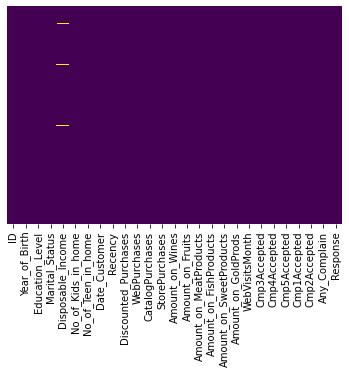

In [11]:
import seaborn as sns
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

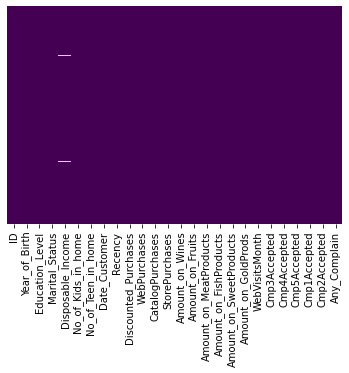

In [12]:
sns.heatmap(test_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

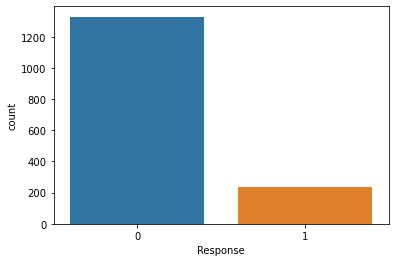

In [13]:
sns.countplot(train_data['Response'])

In [14]:
def numeric_distribution_plot(df):
    """
    Description : Gives distribution plot for all the numeric features
    in the dataframe passed
    
    Argument : Dataframe
    """
    for col in df.columns:
        if df[col].dtype != 'object':
            print(df[col].describe())
            plt.figure(figsize=(12,5))
            plt.title("Distribution of "+col)
            ax = sns.distplot(df[col].dropna())
            plt.tight_layout()
            plt.show()

count    1568.000000
mean     1970.073342
std        11.920781
min      1900.000000
25%      1960.000000
50%      1971.000000
75%      1979.000000
max      1997.000000
Name: Year_of_Birth, dtype: float64


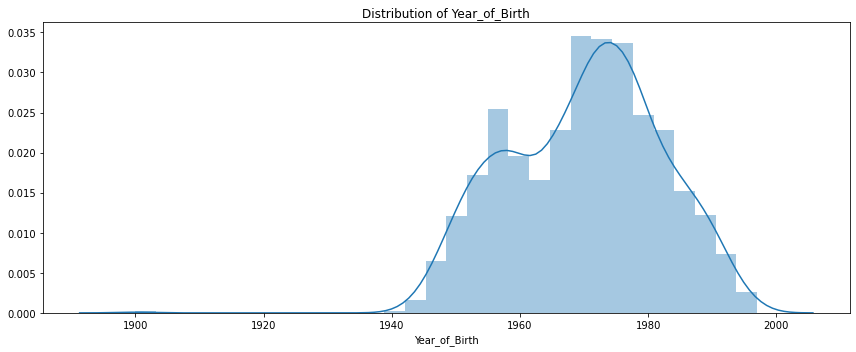

count      1552.000000
mean      62381.186598
std       32089.169563
min        2076.000000
25%       41612.400000
50%       60964.200000
75%       81493.200000
max      799999.200000
Name: Disposable_Income, dtype: float64


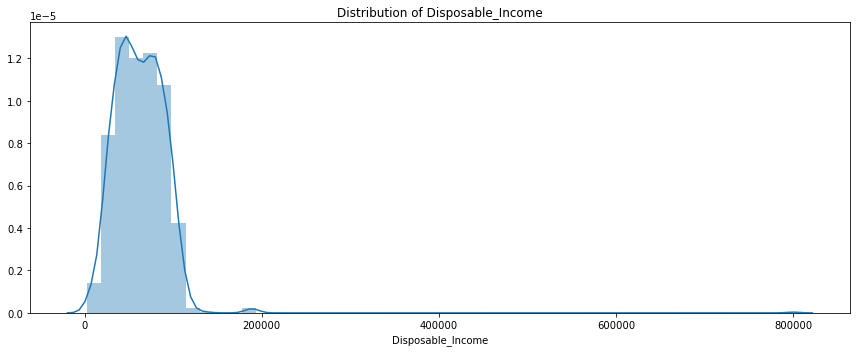

count    1568.000000
mean        0.460459
std         0.540361
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: No_of_Kids_in_home, dtype: float64


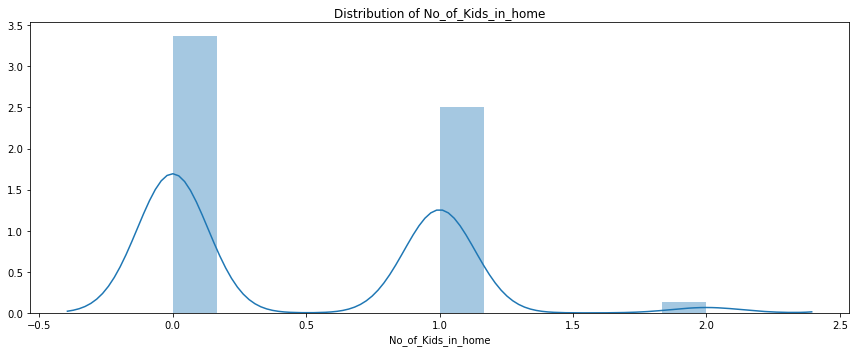

count    1568.000000
mean        0.497449
std         0.544151
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: No_of_Teen_in_home, dtype: float64


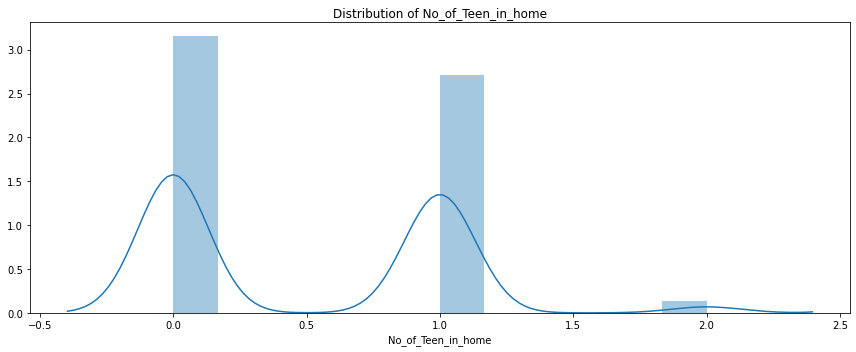

count                    1568
unique                    619
top       2014-12-05 00:00:00
freq                       10
first     2012-01-08 00:00:00
last      2014-12-05 00:00:00
Name: Date_Customer, dtype: object


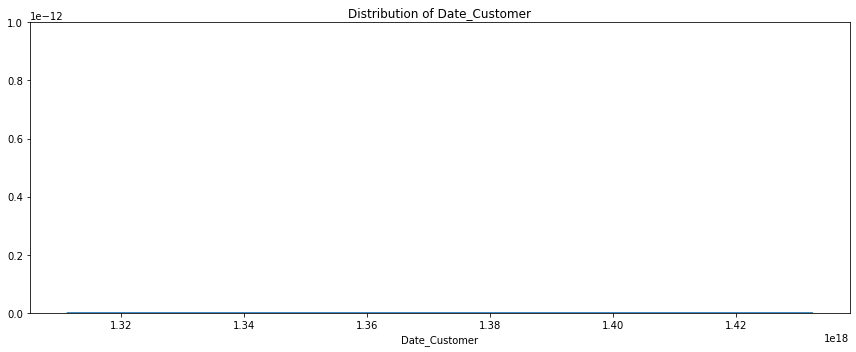

count    1568.000000
mean       55.408801
std        28.788037
min         7.000000
25%        31.000000
50%        56.000000
75%        80.000000
max       106.000000
Name: Recency, dtype: float64


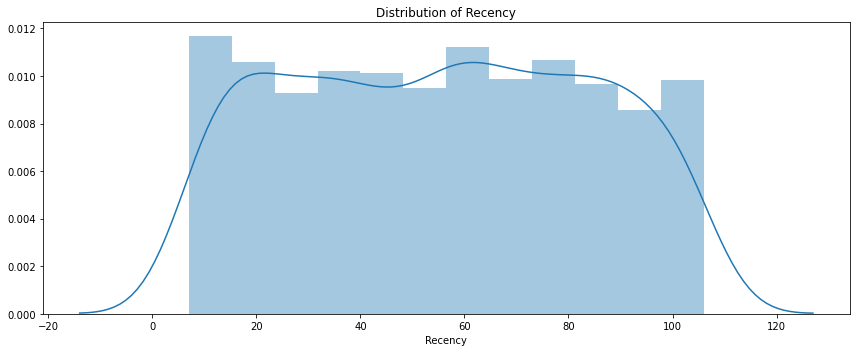

count    1568.000000
mean        2.292730
std         1.937544
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        15.000000
Name: Discounted_Purchases, dtype: float64


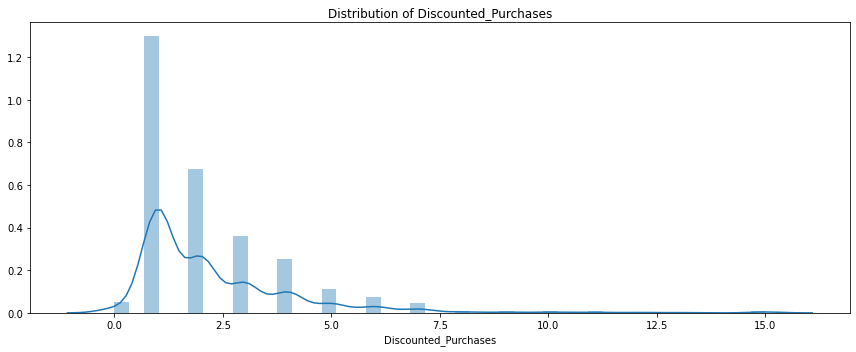

count    1568.000000
mean        4.001276
std         2.773748
min         0.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        27.000000
Name: WebPurchases, dtype: float64


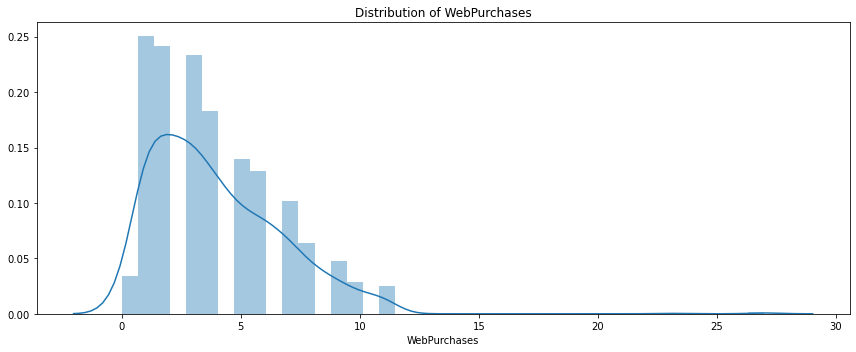

count    1568.000000
mean        2.665816
std         3.043493
min         0.000000
25%         0.000000
50%         2.000000
75%         4.000000
max        28.000000
Name: CatalogPurchases, dtype: float64


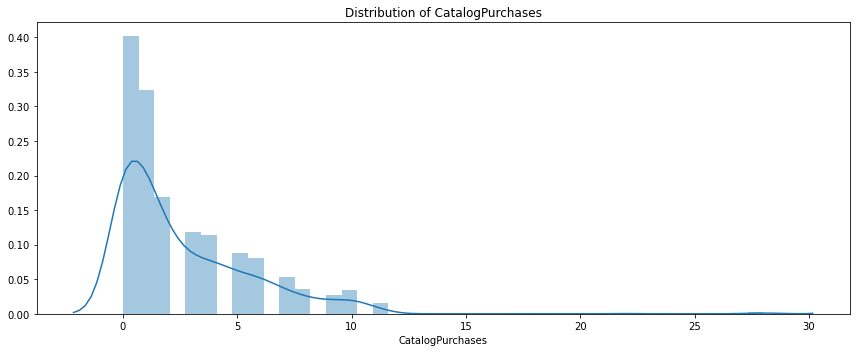

count    1568.000000
mean        5.703444
std         3.260553
min         0.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        13.000000
Name: StorePurchases, dtype: float64


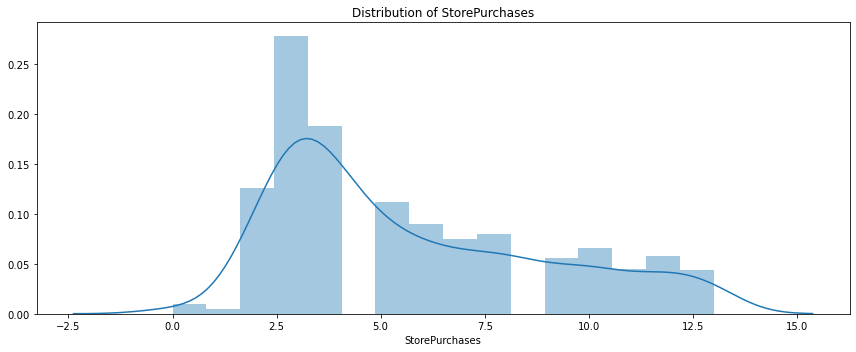

count    1568.000000
mean      303.190051
std       340.141396
min         5.000000
25%        27.000000
50%       167.000000
75%       499.500000
max      1498.000000
Name: Amount_on_Wines, dtype: float64


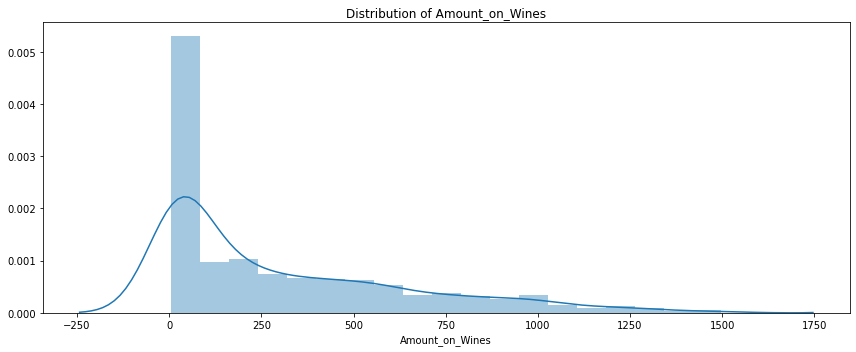

count    1568.000000
mean       29.091199
std        39.565637
min         3.000000
25%         4.000000
50%        11.000000
75%        36.000000
max       202.000000
Name: Amount_on_Fruits, dtype: float64


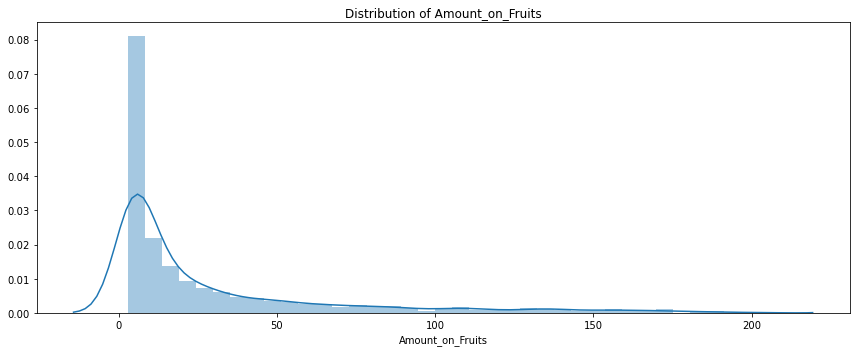

count    1568.000000
mean      168.376276
std       233.419980
min         0.000000
25%        15.000000
50%        64.000000
75%       232.000000
max      1725.000000
Name: Amount_on_MeatProducts, dtype: float64


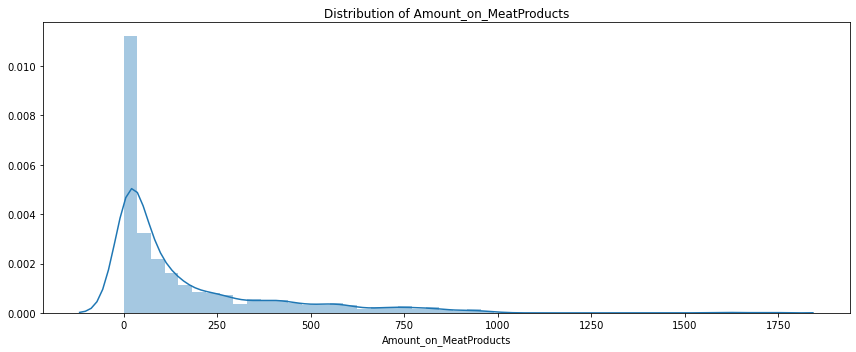

count    1568.000000
mean       37.166454
std        53.994951
min         0.000000
25%         3.000000
50%        12.000000
75%        49.250000
max       259.000000
Name: Amount_on_FishProducts, dtype: float64


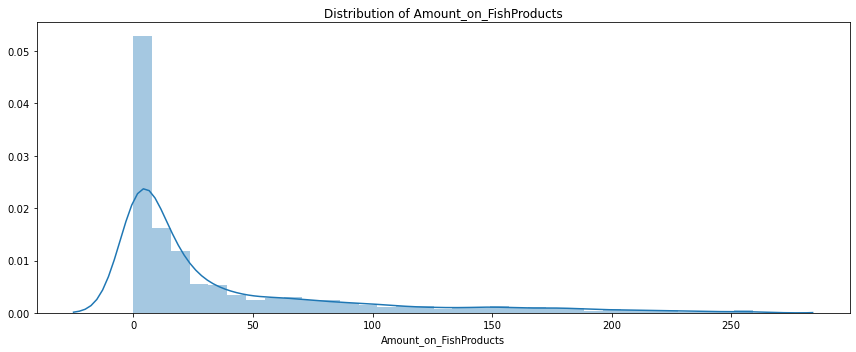

count    1568.000000
mean       26.800383
std        40.857657
min         0.000000
25%         1.000000
50%         8.000000
75%        33.000000
max       263.000000
Name: Amount_on_SweetProducts, dtype: float64


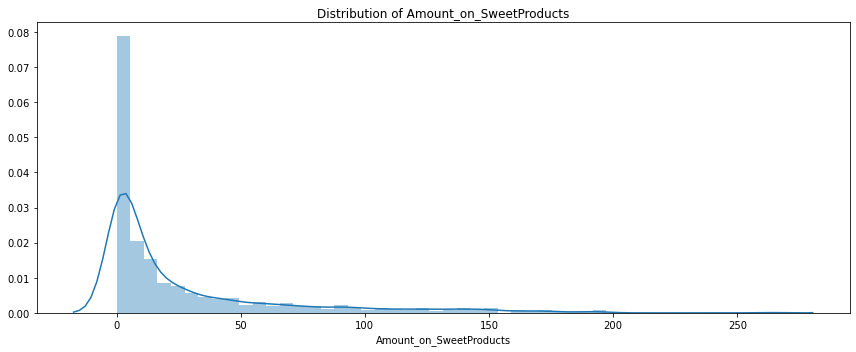

count    1568.000000
mean       43.739158
std        51.591557
min         0.000000
25%         8.000000
50%        25.000000
75%        56.000000
max       362.000000
Name: Amount_on_GoldProds, dtype: float64


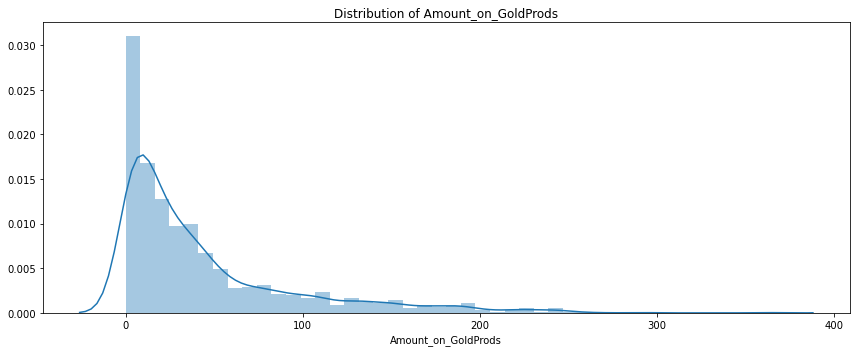

count    1568.000000
mean        5.326531
std         2.468023
min         0.000000
25%         3.000000
50%         6.000000
75%         7.000000
max        20.000000
Name: WebVisitsMonth, dtype: float64


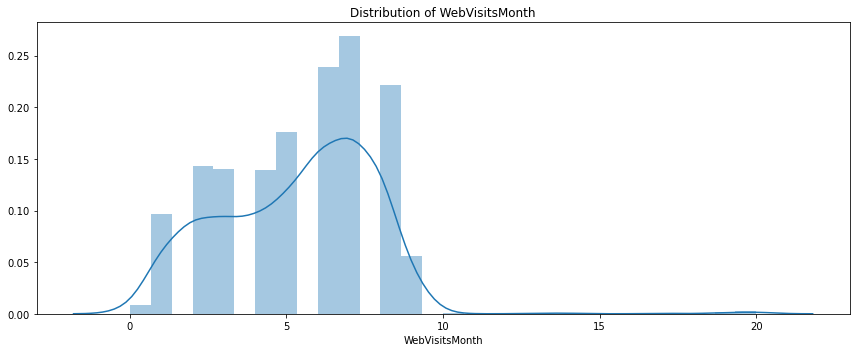

count    1568.000000
mean        0.072704
std         0.259733
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Cmp3Accepted, dtype: float64


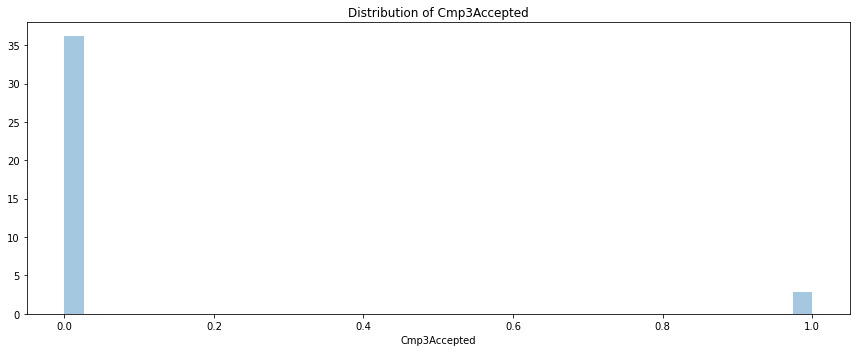

count    1568.000000
mean        0.072704
std         0.259733
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Cmp4Accepted, dtype: float64


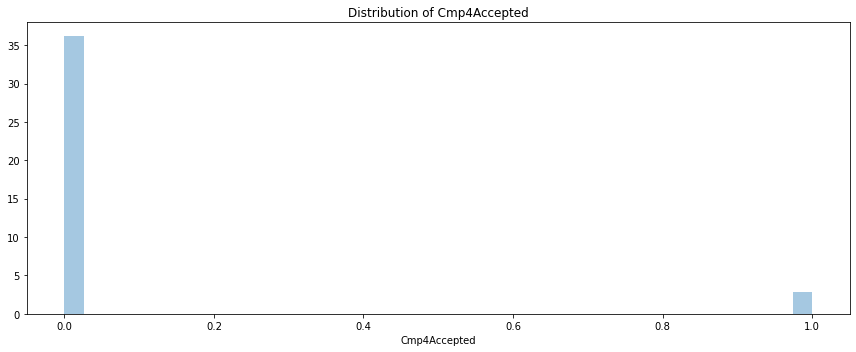

count    1568.000000
mean        0.080357
std         0.271932
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Cmp5Accepted, dtype: float64


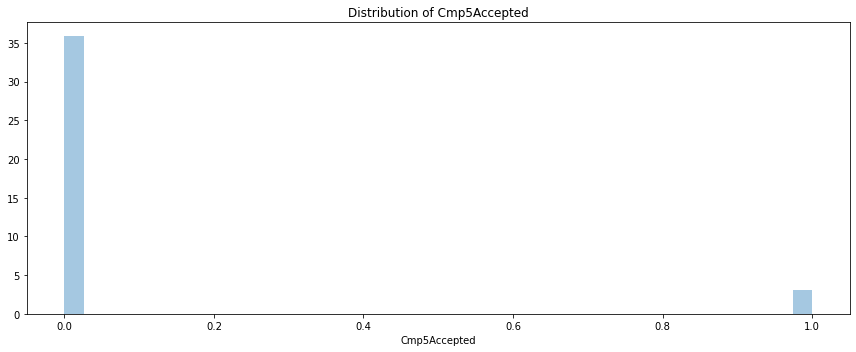

count    1568.000000
mean        0.064413
std         0.245566
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Cmp1Accepted, dtype: float64


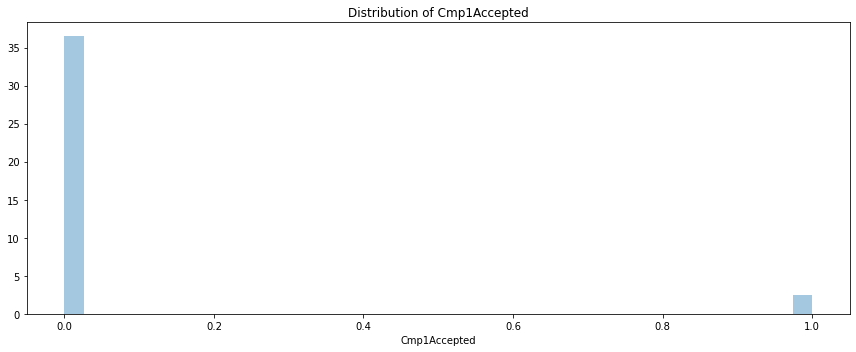

count    1568.000000
mean        0.012755
std         0.112252
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Cmp2Accepted, dtype: float64


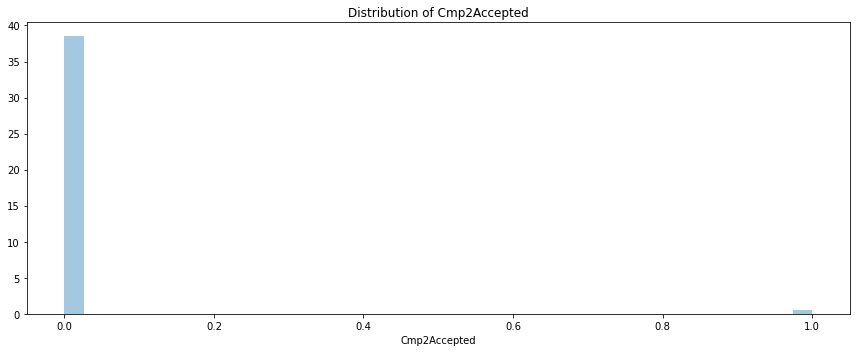

count    1568.000000
mean        0.008291
std         0.090705
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Any_Complain, dtype: float64


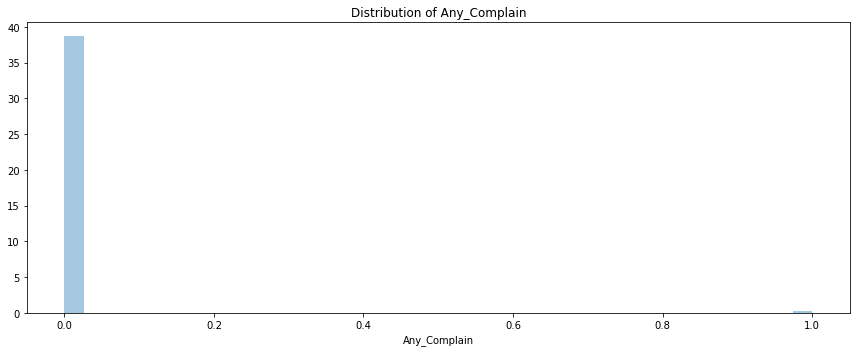

count    1568.000000
mean        0.152423
std         0.359546
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Response, dtype: float64


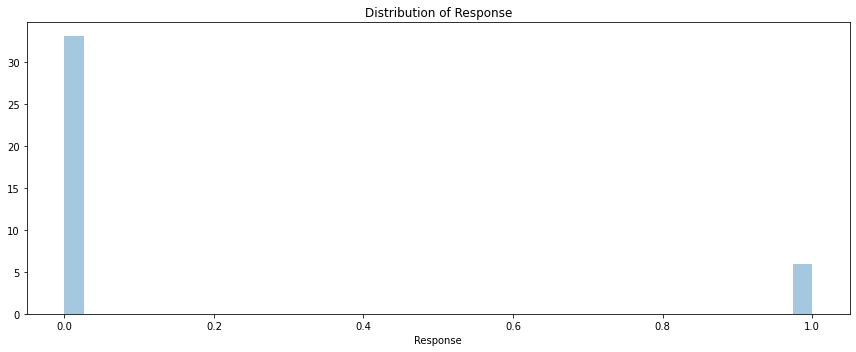

In [15]:
numeric_distribution_plot(train_data)

In [16]:
train_data.describe()

,Year_of_Birth,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
count,1568.000000,1552.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000
mean,1970.073342,62381.186598,0.460459,0.497449,55.408801,2.292730,4.001276,2.665816,5.703444,303.190051,29.091199,168.376276,37.166454,26.800383,43.739158,5.326531,0.072704,0.072704,0.080357,0.064413,0.012755,0.008291,0.152423
std,11.920781,32089.169563,0.540361,0.544151,28.788037,1.937544,2.773748,3.043493,3.260553,340.141396,39.565637,233.419980,53.994951,40.857657,51.591557,2.468023,0.259733,0.259733,0.271932,0.245566,0.112252,0.090705,0.359546
min,1900.000000,2076.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1960.000000,41612.400000,0.000000,0.000000,31.000000,1.000000,2.000000,0.000000,3.000000,27.000000,4.000000,15.000000,3.000000,1.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1971.000000,60964.200000,0.000000,0.000000,56.000000,2.000000,3.000000,2.000000,5.000000,167.000000,11.000000,64.000000,12.000000,8.000000,25.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1979.000000,81493.200000,1.000000,1.000000,80.000000,3.000000,6.000000,4.000000,8.000000,499.500000,36.000000,232.000000,49.250000,33.000000,56.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1997.000000,799999.200000,2.000000,2.000000,106.000000,15.000000,27.000000,28.000000,13.000000,1498.000000,202.000000,1725.000000,259.000000,263.000000,362.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
test_data.describe()

,Year_of_Birth,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain
count,672.000000,664.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000
mean,1969.181548,63434.170482,0.406250,0.526786,57.744048,2.400298,4.279762,2.653274,5.992560,322.342262,29.794643,163.622024,38.363095,27.675595,44.681548,5.293155,0.072917,0.078869,0.055060,0.063988,0.014881,0.011905
std,12.116416,25276.585476,0.532259,0.545293,29.321893,1.919125,2.782585,2.622899,3.221797,328.037431,40.279494,206.752060,56.112424,42.275184,53.520249,2.328867,0.260193,0.269735,0.228266,0.244914,0.121167,0.108538
min,1894.000000,5313.600000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,5.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1960.000000,44219.700000,0.000000,0.000000,33.000000,1.000000,2.000000,1.000000,3.000000,35.750000,5.000000,17.000000,2.750000,2.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,64007.400000,0.000000,1.000000,58.000000,2.000000,4.000000,2.000000,5.000000,209.500000,11.000000,73.000000,11.000000,9.000000,24.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1978.000000,83466.300000,1.000000,1.000000,84.000000,3.000000,6.000000,4.000000,8.000000,514.750000,36.000000,230.500000,50.000000,33.250000,56.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1997.000000,194876.400000,2.000000,2.000000,106.000000,15.000000,25.000000,11.000000,13.000000,1483.000000,202.000000,981.000000,250.000000,198.000000,321.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


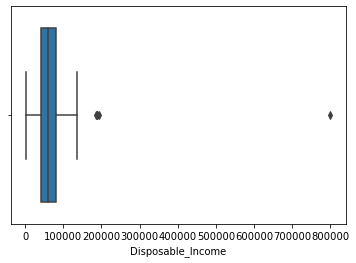

In [18]:
sns.boxplot(train_data['Disposable_Income'])

In [19]:
train_data.loc[train_data['Disposable_Income'] > 200000]

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
190,ID_VIUX07W2,1978,Graduation,Together,799999.2,1,0,2013-02-06,30,4,3,1,3,14,17,18,8,1,12,6,0,0,0,0,0,0,0


In [20]:
train_data = train_data.drop(190)

### DATA PREPROCESSING

In [21]:
train_data['Marital_Status'].unique()

array(['Divorced', 'Together', 'Single', 'Married', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [22]:
train_data['Marital_Status'].value_counts()

Married     615
Together    408
Single      329
Divorced    159
Widow        50
Alone         3
YOLO          2
Absurd        1
Name: Marital_Status, dtype: int64

In [23]:
train_data.loc[train_data['Marital_Status'] == 'Absurd', 'Marital_Status'] = 1
train_data.loc[train_data['Marital_Status'] == 'Alone', 'Marital_Status'] = 2
train_data.loc[train_data['Marital_Status'] == 'Divorced', 'Marital_Status'] = 3
train_data.loc[train_data['Marital_Status'] == 'Married', 'Marital_Status'] = 4
train_data.loc[train_data['Marital_Status'] == 'Single', 'Marital_Status'] = 5
train_data.loc[train_data['Marital_Status'] == 'Together', 'Marital_Status'] = 6
train_data.loc[train_data['Marital_Status'] == 'Widow', 'Marital_Status'] = 7
train_data.loc[train_data['Marital_Status'] == 'YOLO', 'Marital_Status'] = 8

In [24]:
train_data.head()

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
0,ID_4A9AR6FQ,1955,Graduation,3,77504.4,1,1,2014-06-22,56,2,1,1,4,71,3,16,0,6,20,3,0,0,0,0,0,0,0
1,ID_X28T3VEK,1958,Graduation,6,56784.0,0,1,2013-01-08,17,6,5,1,8,205,22,111,50,15,19,6,0,0,0,0,0,0,0
2,ID_AWXARH57,1962,Graduation,5,103714.8,0,0,2013-11-21,17,0,7,4,7,469,31,873,29,18,37,2,0,0,0,1,0,0,1
3,ID_FQVZHE81,1979,2n Cycle,5,46311.6,1,0,2013-09-13,49,3,4,1,3,56,15,49,17,24,24,8,0,0,0,0,0,0,0
4,ID_QVLWGPRN,1959,Graduation,4,87486.0,0,0,2014-01-21,59,1,3,7,9,412,117,445,181,165,203,1,0,0,0,1,0,0,0


In [25]:
test_data.loc[test_data['Marital_Status'] == 'Absurd', 'Marital_Status'] = 1
test_data.loc[test_data['Marital_Status'] == 'Alone', 'Marital_Status'] = 2
test_data.loc[test_data['Marital_Status'] == 'Divorced', 'Marital_Status'] = 3
test_data.loc[test_data['Marital_Status'] == 'Married', 'Marital_Status'] = 4
test_data.loc[test_data['Marital_Status'] == 'Single', 'Marital_Status'] = 5
test_data.loc[test_data['Marital_Status'] == 'Together', 'Marital_Status'] = 6
test_data.loc[test_data['Marital_Status'] == 'Widow', 'Marital_Status'] = 7
test_data.loc[test_data['Marital_Status'] == 'YOLO', 'Marital_Status'] = 8

In [26]:
test_data.head(5)

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain
0,ID_ZPMABNVX,1954,Graduation,5,48556.8,0,1,2013-11-01,85,6,8,2,8,429,20,118,7,23,41,8,0,0,0,0,0,0
1,ID_WFE91NAA,1961,Graduation,7,57499.2,0,1,2012-11-22,79,5,7,4,6,510,3,26,0,0,75,6,0,1,0,0,0,0
2,ID_JV11RBRK,1973,Basic,4,17025.6,0,0,2013-02-28,47,1,2,0,4,7,10,11,16,12,27,6,0,0,0,0,0,0
3,ID_6B7SVKY9,1970,Graduation,6,91983.6,0,0,2013-08-16,98,1,4,7,11,741,66,946,219,189,126,2,0,0,1,1,0,0
4,ID_GOVUZ545,1959,Graduation,6,78235.2,0,2,2013-07-25,41,2,7,6,11,748,22,181,12,0,200,5,1,0,0,0,0,0


In [27]:
train_data['Education_Level'].unique()

array(['Graduation', '2n Cycle', 'Master', 'PhD', 'Basic'], dtype=object)

In [28]:
train_data.loc[train_data['Education_Level'] == 'Graduation', 'Education_Level'] = 1
train_data.loc[train_data['Education_Level'] == '2n Cycle', 'Education_Level'] = 2
train_data.loc[train_data['Education_Level'] == 'Master', 'Education_Level'] = 3
train_data.loc[train_data['Education_Level'] == 'PhD', 'Education_Level'] = 4
train_data.loc[train_data['Education_Level'] == 'Basic', 'Education_Level'] = 5

In [29]:
test_data.loc[test_data['Education_Level'] == 'Graduation', 'Education_Level'] = 1
test_data.loc[test_data['Education_Level'] == '2n Cycle', 'Education_Level'] = 2
test_data.loc[test_data['Education_Level'] == 'Master', 'Education_Level'] = 3
test_data.loc[test_data['Education_Level'] == 'PhD', 'Education_Level'] = 4
test_data.loc[test_data['Education_Level'] == 'Basic', 'Education_Level'] = 5

In [30]:
train_data.head()

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
0,ID_4A9AR6FQ,1955,1,3,77504.4,1,1,2014-06-22,56,2,1,1,4,71,3,16,0,6,20,3,0,0,0,0,0,0,0
1,ID_X28T3VEK,1958,1,6,56784.0,0,1,2013-01-08,17,6,5,1,8,205,22,111,50,15,19,6,0,0,0,0,0,0,0
2,ID_AWXARH57,1962,1,5,103714.8,0,0,2013-11-21,17,0,7,4,7,469,31,873,29,18,37,2,0,0,0,1,0,0,1
3,ID_FQVZHE81,1979,2,5,46311.6,1,0,2013-09-13,49,3,4,1,3,56,15,49,17,24,24,8,0,0,0,0,0,0,0
4,ID_QVLWGPRN,1959,1,4,87486.0,0,0,2014-01-21,59,1,3,7,9,412,117,445,181,165,203,1,0,0,0,1,0,0,0


In [31]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1567 entries, 0 to 1567
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       1567 non-null   object        
 1   Year_of_Birth            1567 non-null   int64         
 2   Education_Level          1567 non-null   object        
 3   Marital_Status           1567 non-null   object        
 4   Disposable_Income        1551 non-null   float64       
 5   No_of_Kids_in_home       1567 non-null   int64         
 6   No_of_Teen_in_home       1567 non-null   int64         
 7   Date_Customer            1567 non-null   datetime64[ns]
 8   Recency                  1567 non-null   int64         
 9   Discounted_Purchases     1567 non-null   int64         
 10  WebPurchases             1567 non-null   int64         
 11  CatalogPurchases         1567 non-null   int64         
 12  StorePurchases           1567 non-

In [32]:
train_data = train_data.astype({'Education_Level': int, 'Marital_Status': int})

In [33]:
test_data = test_data.astype({'Education_Level': int, 'Marital_Status': int})

# feature = train.columns.drop(['Response', 'ID', 'Date_Customer'])

In [34]:
train_data.shape

(1567, 27)

## TREATING MISSING VALUES

In [35]:
train_data.groupby(['No_of_Kids_in_home'])['Disposable_Income'].mean()

No_of_Kids_in_home
0    74785.532646
1    45180.370233
2    48075.563636
Name: Disposable_Income, dtype: float64

In [36]:
test_data.groupby(['No_of_Kids_in_home'])['Disposable_Income'].mean()

No_of_Kids_in_home
0    72752.438049
1    48619.214938
2    44196.830769
Name: Disposable_Income, dtype: float64

In [37]:
def Disposable_Income(cols):
    Disposable_Income = cols[1]
    No_of_Kids_in_home= cols[0]
    if pd.isnull(Disposable_Income):
        if No_of_Kids_in_home == 0:
            return 72752.438049
        elif No_of_Kids_in_home == 1:
            return 48619.214938
        else:
            return 48075.563636
    else:
        return Disposable_Income

In [38]:
train_data['Disposable_Income'] = train_data[['No_of_Kids_in_home','Disposable_Income']].apply(Disposable_Income,axis=1)

In [39]:
train_data.head()

,ID,Year_of_Birth,Education_Level,Marital_Status,Disposable_Income,No_of_Kids_in_home,No_of_Teen_in_home,Date_Customer,Recency,Discounted_Purchases,WebPurchases,CatalogPurchases,StorePurchases,Amount_on_Wines,Amount_on_Fruits,Amount_on_MeatProducts,Amount_on_FishProducts,Amount_on_SweetProducts,Amount_on_GoldProds,WebVisitsMonth,Cmp3Accepted,Cmp4Accepted,Cmp5Accepted,Cmp1Accepted,Cmp2Accepted,Any_Complain,Response
0,ID_4A9AR6FQ,1955,1,3,77504.4,1,1,2014-06-22,56,2,1,1,4,71,3,16,0,6,20,3,0,0,0,0,0,0,0
1,ID_X28T3VEK,1958,1,6,56784.0,0,1,2013-01-08,17,6,5,1,8,205,22,111,50,15,19,6,0,0,0,0,0,0,0
2,ID_AWXARH57,1962,1,5,103714.8,0,0,2013-11-21,17,0,7,4,7,469,31,873,29,18,37,2,0,0,0,1,0,0,1
3,ID_FQVZHE81,1979,2,5,46311.6,1,0,2013-09-13,49,3,4,1,3,56,15,49,17,24,24,8,0,0,0,0,0,0,0
4,ID_QVLWGPRN,1959,1,4,87486.0,0,0,2014-01-21,59,1,3,7,9,412,117,445,181,165,203,1,0,0,0,1,0,0,0


In [40]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1567 entries, 0 to 1567
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       1567 non-null   object        
 1   Year_of_Birth            1567 non-null   int64         
 2   Education_Level          1567 non-null   int32         
 3   Marital_Status           1567 non-null   int32         
 4   Disposable_Income        1567 non-null   float64       
 5   No_of_Kids_in_home       1567 non-null   int64         
 6   No_of_Teen_in_home       1567 non-null   int64         
 7   Date_Customer            1567 non-null   datetime64[ns]
 8   Recency                  1567 non-null   int64         
 9   Discounted_Purchases     1567 non-null   int64         
 10  WebPurchases             1567 non-null   int64         
 11  CatalogPurchases         1567 non-null   int64         
 12  StorePurchases           1567 non-

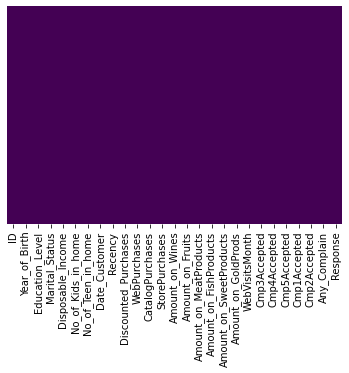

In [41]:
import seaborn as sns
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [42]:
test_data['Disposable_Income'] = test_data[['No_of_Kids_in_home','Disposable_Income']].apply(Disposable_Income,axis=1)

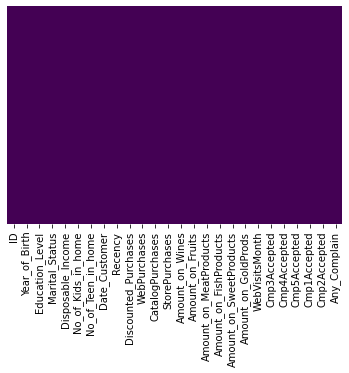

In [43]:
import seaborn as sns
sns.heatmap(test_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [44]:
test_data.columns

Index(['ID', 'Year_of_Birth', 'Education_Level', 'Marital_Status',
       'Disposable_Income', 'No_of_Kids_in_home', 'No_of_Teen_in_home',
       'Date_Customer', 'Recency', 'Discounted_Purchases', 'WebPurchases',
       'CatalogPurchases', 'StorePurchases', 'Amount_on_Wines',
       'Amount_on_Fruits', 'Amount_on_MeatProducts', 'Amount_on_FishProducts',
       'Amount_on_SweetProducts', 'Amount_on_GoldProds', 'WebVisitsMonth',
       'Cmp3Accepted', 'Cmp4Accepted', 'Cmp5Accepted', 'Cmp1Accepted',
       'Cmp2Accepted', 'Any_Complain'],
      dtype='object')

In [45]:
train_data.columns

Index(['ID', 'Year_of_Birth', 'Education_Level', 'Marital_Status',
       'Disposable_Income', 'No_of_Kids_in_home', 'No_of_Teen_in_home',
       'Date_Customer', 'Recency', 'Discounted_Purchases', 'WebPurchases',
       'CatalogPurchases', 'StorePurchases', 'Amount_on_Wines',
       'Amount_on_Fruits', 'Amount_on_MeatProducts', 'Amount_on_FishProducts',
       'Amount_on_SweetProducts', 'Amount_on_GoldProds', 'WebVisitsMonth',
       'Cmp3Accepted', 'Cmp4Accepted', 'Cmp5Accepted', 'Cmp1Accepted',
       'Cmp2Accepted', 'Any_Complain', 'Response'],
      dtype='object')

In [46]:
test_data['Response'] = 'test'

In [47]:
test_data.columns

Index(['ID', 'Year_of_Birth', 'Education_Level', 'Marital_Status',
       'Disposable_Income', 'No_of_Kids_in_home', 'No_of_Teen_in_home',
       'Date_Customer', 'Recency', 'Discounted_Purchases', 'WebPurchases',
       'CatalogPurchases', 'StorePurchases', 'Amount_on_Wines',
       'Amount_on_Fruits', 'Amount_on_MeatProducts', 'Amount_on_FishProducts',
       'Amount_on_SweetProducts', 'Amount_on_GoldProds', 'WebVisitsMonth',
       'Cmp3Accepted', 'Cmp4Accepted', 'Cmp5Accepted', 'Cmp1Accepted',
       'Cmp2Accepted', 'Any_Complain', 'Response'],
      dtype='object')

In [48]:
data = pd.concat([train_data, test_data]).reset_index(drop = True)

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2239 entries, 0 to 2238
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       2239 non-null   object        
 1   Year_of_Birth            2239 non-null   int64         
 2   Education_Level          2239 non-null   int32         
 3   Marital_Status           2239 non-null   int32         
 4   Disposable_Income        2239 non-null   float64       
 5   No_of_Kids_in_home       2239 non-null   int64         
 6   No_of_Teen_in_home       2239 non-null   int64         
 7   Date_Customer            2239 non-null   datetime64[ns]
 8   Recency                  2239 non-null   int64         
 9   Discounted_Purchases     2239 non-null   int64         
 10  WebPurchases             2239 non-null   int64         
 11  CatalogPurchases         2239 non-null   int64         
 12  StorePurchases           2239 non-

In [50]:
data.shape

(2239, 27)

## Feature Engineering

In [51]:
max(data.Date_Customer) #maximum date of which a customer has enrolled on spent with the company

Timestamp('2014-12-06 00:00:00')

In [52]:
data['year'] = data.Date_Customer.dt.year  #Extracting year
data['month'] = data.Date_Customer.dt.month # Extracting month  
data['quater'] = data.Date_Customer.dt.quarter # Extracting quarter


today = pd.to_datetime('2015-1-1') # setting the current date close to the date of which the last user as spent or enrolled which is 2014-12-06

#Getting the no of days, month when th customer join and now 
data['duration_days'] = (today - data['Date_Customer']).dt.days  #No of days of which a customer has enrolled on spent with the company 
data['duration_months'] = ((today- data.Date_Customer)/np.timedelta64(1, 'M'))  #No of months of which a customer has enrolled on spent with the company
data['duration_months'] = data['duration_months'].astype(int) 

#Getting information of customer that join at the start of the month and at the end of the month
data['is_month_end'] = data.Date_Customer.dt.is_month_end.astype(int)
data['is_month_start'] = data.Date_Customer.dt.is_month_start.astype(int)

## FEATURES INTERACTION (ADDITION /MULTIPLICATION/ SUBTRACTION E.T.C)

In [53]:
data['total_children'] = data['No_of_Kids_in_home'] + data['No_of_Teen_in_home'] #

In [54]:
poly_feature_1 = ['Discounted_Purchases', 'WebPurchases', 'CatalogPurchases',
       'StorePurchases'] # 2 raise to power of 4 features
poly_feature_2 = ['Amount_on_Wines', 'Amount_on_Fruits',
       'Amount_on_MeatProducts', 'Amount_on_FishProducts',
       'Amount_on_SweetProducts', 'Amount_on_GoldProds'] # 2 raise to power of 6 features

In [55]:
from sklearn.preprocessing import PolynomialFeatures

In [56]:
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

poly1 = poly.fit_transform(data[poly_feature_1])
poly2 = poly.fit_transform(data[poly_feature_2])

In [57]:
#Renaming the features to poly1_.....n, poly2_....n
df_poly1 = pd.DataFrame(poly1, columns=[f"poly1_{i}" for i in range(poly1.shape[1])])
df_poly2 = pd.DataFrame(poly2, columns=[f"poly2_{i}" for i in range(poly2.shape[1])])

In [58]:
df_poly1.columns

Index(['poly1_0', 'poly1_1', 'poly1_2', 'poly1_3', 'poly1_4', 'poly1_5',
       'poly1_6', 'poly1_7', 'poly1_8', 'poly1_9'],
      dtype='object')

In [59]:
df_poly2.columns

Index(['poly2_0', 'poly2_1', 'poly2_2', 'poly2_3', 'poly2_4', 'poly2_5',
       'poly2_6', 'poly2_7', 'poly2_8', 'poly2_9', 'poly2_10', 'poly2_11',
       'poly2_12', 'poly2_13', 'poly2_14', 'poly2_15', 'poly2_16', 'poly2_17',
       'poly2_18', 'poly2_19', 'poly2_20'],
      dtype='object')

In [60]:
data.columns

Index(['ID', 'Year_of_Birth', 'Education_Level', 'Marital_Status',
       'Disposable_Income', 'No_of_Kids_in_home', 'No_of_Teen_in_home',
       'Date_Customer', 'Recency', 'Discounted_Purchases', 'WebPurchases',
       'CatalogPurchases', 'StorePurchases', 'Amount_on_Wines',
       'Amount_on_Fruits', 'Amount_on_MeatProducts', 'Amount_on_FishProducts',
       'Amount_on_SweetProducts', 'Amount_on_GoldProds', 'WebVisitsMonth',
       'Cmp3Accepted', 'Cmp4Accepted', 'Cmp5Accepted', 'Cmp1Accepted',
       'Cmp2Accepted', 'Any_Complain', 'Response', 'year', 'month', 'quater',
       'duration_days', 'duration_months', 'is_month_end', 'is_month_start',
       'total_children'],
      dtype='object')

In [61]:
data.shape

(2239, 35)

In [62]:
# Merging the datas created from polynomial to the whole datsets
new_data = pd.concat([data.drop('Date_Customer', axis = 1), df_poly1], axis = 1)
new_data = pd.concat([new_data, df_poly2], axis = 1)

In [63]:
new_data['total_purchase'] = new_data[poly_feature_1].sum(axis = 1) # sum of all features created from poly1
new_data['total_amount_on'] = new_data[poly_feature_2].sum(axis = 1) # sum of all features created from poly2

In [64]:
# new_data['year_month'] = 
new_data['year_month'] = new_data['year'].apply(str) + "_"  + new_data['month'].apply(str) #Feting the strings total number of customer that join each month odf the year by using categorically method

In [65]:
# bin_label = [1,2,3,4,5]
new_data['Recency_bin'] = pd.qcut(new_data.Recency, q = [0, .2, .4, .6, .8, 1], labels=False) #Arranginging recency in percentile of 20% increasing, Bin is done to convert your continous data into group data 

In [66]:
# Calculating mean, std, max, min for each of the recency groups e.g the mean of all the customer that makes a purchase in a month and in year e.t.c

new_data['Recency' + '_mean_on_yr_mth'] = new_data['Recency'].groupby(new_data['year_month']).transform('mean')
new_data['Recency' + '_std_on_yr_mth'] = new_data['Recency'].groupby(new_data['year_month']).transform('std')
new_data['Recency' + '_max_on_yr_mth'] = new_data['Recency'].groupby(new_data['year_month']).transform('max')
new_data['Recency' + '_min_on_yr_mth'] = new_data['Recency'].groupby(new_data['year_month']).transform('min')

In [67]:
new_data['year_month_int'], _ = pd.factorize(new_data['year_month']) # label encoding 

In [68]:
new_data.columns

Index(['ID', 'Year_of_Birth', 'Education_Level', 'Marital_Status',
       'Disposable_Income', 'No_of_Kids_in_home', 'No_of_Teen_in_home',
       'Recency', 'Discounted_Purchases', 'WebPurchases', 'CatalogPurchases',
       'StorePurchases', 'Amount_on_Wines', 'Amount_on_Fruits',
       'Amount_on_MeatProducts', 'Amount_on_FishProducts',
       'Amount_on_SweetProducts', 'Amount_on_GoldProds', 'WebVisitsMonth',
       'Cmp3Accepted', 'Cmp4Accepted', 'Cmp5Accepted', 'Cmp1Accepted',
       'Cmp2Accepted', 'Any_Complain', 'Response', 'year', 'month', 'quater',
       'duration_days', 'duration_months', 'is_month_end', 'is_month_start',
       'total_children', 'poly1_0', 'poly1_1', 'poly1_2', 'poly1_3', 'poly1_4',
       'poly1_5', 'poly1_6', 'poly1_7', 'poly1_8', 'poly1_9', 'poly2_0',
       'poly2_1', 'poly2_2', 'poly2_3', 'poly2_4', 'poly2_5', 'poly2_6',
       'poly2_7', 'poly2_8', 'poly2_9', 'poly2_10', 'poly2_11', 'poly2_12',
       'poly2_13', 'poly2_14', 'poly2_15', 'poly2_16', 'p

In [69]:
new_data.shape

(2239, 74)

In [70]:
new_data.columns

Index(['ID', 'Year_of_Birth', 'Education_Level', 'Marital_Status',
       'Disposable_Income', 'No_of_Kids_in_home', 'No_of_Teen_in_home',
       'Recency', 'Discounted_Purchases', 'WebPurchases', 'CatalogPurchases',
       'StorePurchases', 'Amount_on_Wines', 'Amount_on_Fruits',
       'Amount_on_MeatProducts', 'Amount_on_FishProducts',
       'Amount_on_SweetProducts', 'Amount_on_GoldProds', 'WebVisitsMonth',
       'Cmp3Accepted', 'Cmp4Accepted', 'Cmp5Accepted', 'Cmp1Accepted',
       'Cmp2Accepted', 'Any_Complain', 'Response', 'year', 'month', 'quater',
       'duration_days', 'duration_months', 'is_month_end', 'is_month_start',
       'total_children', 'poly1_0', 'poly1_1', 'poly1_2', 'poly1_3', 'poly1_4',
       'poly1_5', 'poly1_6', 'poly1_7', 'poly1_8', 'poly1_9', 'poly2_0',
       'poly2_1', 'poly2_2', 'poly2_3', 'poly2_4', 'poly2_5', 'poly2_6',
       'poly2_7', 'poly2_8', 'poly2_9', 'poly2_10', 'poly2_11', 'poly2_12',
       'poly2_13', 'poly2_14', 'poly2_15', 'poly2_16', 'p

In [71]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2239 entries, 0 to 2238
Data columns (total 74 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       2239 non-null   object 
 1   Year_of_Birth            2239 non-null   int64  
 2   Education_Level          2239 non-null   int32  
 3   Marital_Status           2239 non-null   int32  
 4   Disposable_Income        2239 non-null   float64
 5   No_of_Kids_in_home       2239 non-null   int64  
 6   No_of_Teen_in_home       2239 non-null   int64  
 7   Recency                  2239 non-null   int64  
 8   Discounted_Purchases     2239 non-null   int64  
 9   WebPurchases             2239 non-null   int64  
 10  CatalogPurchases         2239 non-null   int64  
 11  StorePurchases           2239 non-null   int64  
 12  Amount_on_Wines          2239 non-null   int64  
 13  Amount_on_Fruits         2239 non-null   int64  
 14  Amount_on_MeatProducts  

In [72]:
features = new_data.select_dtypes(include = 'number').columns # Selecting all numeric data

In [73]:
features # All the numeric datas

Index(['Year_of_Birth', 'Education_Level', 'Marital_Status',
       'Disposable_Income', 'No_of_Kids_in_home', 'No_of_Teen_in_home',
       'Recency', 'Discounted_Purchases', 'WebPurchases', 'CatalogPurchases',
       'StorePurchases', 'Amount_on_Wines', 'Amount_on_Fruits',
       'Amount_on_MeatProducts', 'Amount_on_FishProducts',
       'Amount_on_SweetProducts', 'Amount_on_GoldProds', 'WebVisitsMonth',
       'Cmp3Accepted', 'Cmp4Accepted', 'Cmp5Accepted', 'Cmp1Accepted',
       'Cmp2Accepted', 'Any_Complain', 'year', 'month', 'quater',
       'duration_days', 'duration_months', 'is_month_end', 'is_month_start',
       'total_children', 'poly1_0', 'poly1_1', 'poly1_2', 'poly1_3', 'poly1_4',
       'poly1_5', 'poly1_6', 'poly1_7', 'poly1_8', 'poly1_9', 'poly2_0',
       'poly2_1', 'poly2_2', 'poly2_3', 'poly2_4', 'poly2_5', 'poly2_6',
       'poly2_7', 'poly2_8', 'poly2_9', 'poly2_10', 'poly2_11', 'poly2_12',
       'poly2_13', 'poly2_14', 'poly2_15', 'poly2_16', 'poly2_17', 'poly2_1

In [74]:
#splitting data 
train_df = new_data.loc[(new_data['Response'] != 'test')].reset_index(drop = True)
test_df = new_data.loc[(new_data['Response'] == 'test')].reset_index(drop = True)

In [75]:
# train_df.info()

In [76]:
# train_df[features].info()

In [77]:
train_df['Response'] = train_df['Response'].apply(int)

In [78]:
target = 'Response'

 ## MODELLING

In [79]:
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss, f1_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, cross_val_score

In [80]:
# pip install --upgrade pip lightgbm

In [81]:
X = train_df[features]
y = train_df[target]

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## BASELINE MODELLING

In [83]:
model = XGBClassifier(scale_pos_weight = 8,max_depth = 8, n_estimators = 500)
model.fit(X_train, y_train)
prediction = model.predict(X_test)

print(f1_score(prediction, y_test))

[00:50:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.5581395348837209


## SMOTE

In [84]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [85]:
model = LGBMClassifier(scale_pos_weight = 1,max_depth=6, n_estimators = 1000, learning_rate=0.01)
model.fit(X_train_res, y_train_res)
prediction = model.predict(X_test)

print(f1_score(prediction, y_test))

0.5


In [86]:
from imblearn.over_sampling import SMOTE
sm =SMOTE(sampling_strategy={1:1000, 0:1400},random_state=5555)
X_, y_ = sm.fit_resample(train_df[features], train_df[target])

In [87]:
oof_f1=[]
oof_predictions=[]

params = {'learning_rate': 0.3,
         'subsample': 0.7845527188607021,
         'colsample_bytree': 0.6474680443294045,
         'max_depth': 8,
         'scale_pos_weight': 1}

fold=StratifiedKFold(n_splits=5)#15#5#10

i=1
for train_index, test_index in fold.split(X_,y_):
        
    X_train, X_test = X_.iloc[train_index], X_.iloc[test_index]
    y_train, y_test = y_.iloc[train_index], y_.iloc[test_index]

    model = LGBMClassifier(**params, n_estimators=1000)

    model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=300, verbose = False)#erly100
    preds=model.predict(X_test)

    print(f'F1, fold {i}: {f1_score(y_test,preds)}')
    i+=1                
    oof_f1.append(f1_score(y_test,preds))
    p2 = model.predict_proba(test_df[features])[:, -1]
    oof_predictions.append(p2)
    

print(np.mean(oof_f1))

F1, fold 1: 0.6435331230283912
F1, fold 2: 0.9306930693069307
F1, fold 3: 0.9707317073170733
F1, fold 4: 0.9383886255924171
F1, fold 5: 0.9496402877697843
0.8865973626029193


Text(0.5, 1.0, 'Model features importance:')

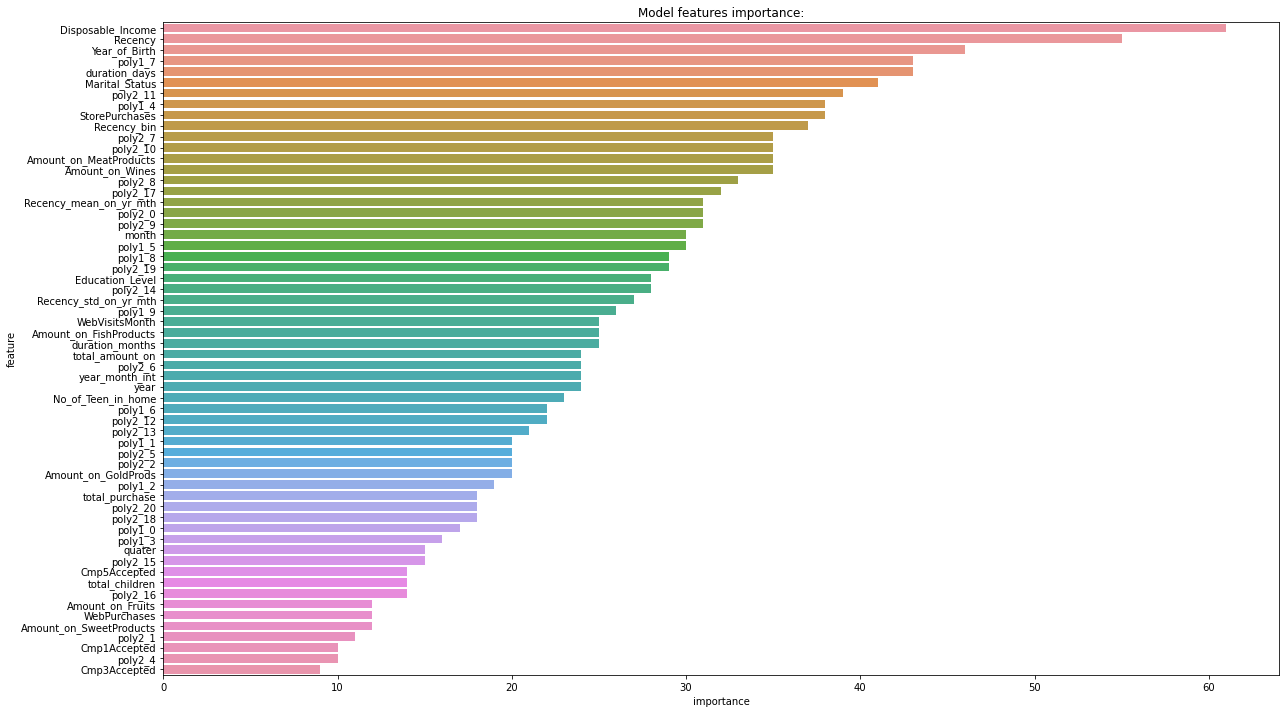

In [88]:
feature_importance_df = pd.DataFrame(model.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = new_data[features].columns

plt.figure(figsize=(20, 12));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(60))
plt.title('Model features importance:')

## Feature Selection

In [89]:
new_feat = feature_importance_df.sort_values(by = ['importance'], ascending = False).head(50)['feature'].to_list()

In [90]:
new_feat

['Disposable_Income',
 'Recency',
 'Year_of_Birth',
 'poly1_7',
 'duration_days',
 'Marital_Status',
 'poly2_11',
 'poly1_4',
 'StorePurchases',
 'Recency_bin',
 'poly2_7',
 'poly2_10',
 'Amount_on_MeatProducts',
 'Amount_on_Wines',
 'poly2_8',
 'poly2_17',
 'Recency_mean_on_yr_mth',
 'poly2_0',
 'poly2_9',
 'month',
 'poly1_5',
 'poly1_8',
 'poly2_19',
 'Education_Level',
 'poly2_14',
 'Recency_std_on_yr_mth',
 'poly1_9',
 'WebVisitsMonth',
 'Amount_on_FishProducts',
 'duration_months',
 'total_amount_on',
 'poly2_6',
 'year_month_int',
 'year',
 'No_of_Teen_in_home',
 'poly1_6',
 'poly2_12',
 'poly2_13',
 'poly1_1',
 'poly2_5',
 'poly2_2',
 'Amount_on_GoldProds',
 'poly1_2',
 'total_purchase',
 'poly2_20',
 'poly2_18',
 'poly1_0',
 'poly1_3',
 'quater',
 'poly2_15']

## Hyperparameter Tuning

In [91]:
import optuna

In [92]:
X = train_df[features]
y = train_df[target]

In [93]:
X = train_df[new_feat]

In [94]:
def objective(trial):
    oof_f1=[]
    oof_predictions=[]


    param = {}
#     param['objective'] = "Logloss"
    param['learning_rate'] = trial.suggest_discrete_uniform("learning_rate", 0.001, 0.1, 0.001)
    param['depth'] = trial.suggest_int('depth', 3, 15)
    param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)
    param['min_child_samples'] = trial.suggest_categorical('min_child_samples', [1, 4, 8, 16, 32])
    param['iterations'] = trial.suggest_discrete_uniform("iterations", 200, 2000, 50)
    param['use_best_model'] = True
    param["colsample_bylevel"] =  trial.suggest_float("colsample_bylevel", 0.01, 0.1)
    param['random_state'] = 0
    param['scale_pos_weight'] = trial.suggest_int('scale_pos_weight', 1, 10)
    param['bootstrap_type'] = trial.suggest_categorical("bootstrap_type", ["Bayesian", "Bernoulli", "MVS"])
    param['logging_level'] = 'Silent'



    fold=StratifiedKFold(n_splits=5)#15#5#10
    i=1
    for train_index, test_index in fold.split(X,y):
        
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model = CatBoostClassifier(**param)
#         model = XGBClassifier(**param)
    

        model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=200, verbose = False)#early100
        preds=model.predict(X_test)

        oof_f1.append(f1_score(y_test,preds))

    return np.mean(oof_f1)


In [95]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100) #10000

[I 2022-03-13 00:50:14,460] A new study created in memory with name: no-name-01c7d0c7-2b9b-49f6-9302-e0ecb11e5a3a
[I 2022-03-13 00:50:26,502] Trial 0 finished with value: 0.5484049107858632 and parameters: {'learning_rate': 0.039, 'depth': 4, 'l2_leaf_reg': 5.0, 'min_child_samples': 4, 'iterations': 1600.0, 'colsample_bylevel': 0.04543987003715986, 'scale_pos_weight': 2, 'bootstrap_type': 'Bernoulli'}. Best is trial 0 with value: 0.5484049107858632.
[I 2022-03-13 00:50:33,634] Trial 1 finished with value: 0.5148766117618774 and parameters: {'learning_rate': 0.092, 'depth': 15, 'l2_leaf_reg': 4.5, 'min_child_samples': 1, 'iterations': 1650.0, 'colsample_bylevel': 0.019263683067890863, 'scale_pos_weight': 2, 'bootstrap_type': 'MVS'}. Best is trial 0 with value: 0.5484049107858632.
[I 2022-03-13 00:50:42,916] Trial 2 finished with value: 0.5475686290228005 and parameters: {'learning_rate': 0.026000000000000002, 'depth': 7, 'l2_leaf_reg': 5.5, 'min_child_samples': 4, 'iterations': 1650.0, 

In [96]:
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials: 100
Best trial:
  Value: 0.5885771776382805
  Params: 
    learning_rate: 0.029
    depth: 5
    l2_leaf_reg: 2.5
    min_child_samples: 16
    iterations: 500.0
    colsample_bylevel: 0.0919260168756181
    scale_pos_weight: 5
    bootstrap_type: MVS


In [97]:
new_feat2 = ['Year_of_Birth', 'Education_Level', 'Marital_Status',
       'Disposable_Income', 'No_of_Kids_in_home', 'No_of_Teen_in_home',
       'Recency', 'Discounted_Purchases', 'WebPurchases', 'CatalogPurchases',
       'StorePurchases', 'Amount_on_Wines', 'Amount_on_Fruits',
       'Amount_on_MeatProducts', 'Amount_on_FishProducts',
       'Amount_on_SweetProducts', 'Amount_on_GoldProds', 'WebVisitsMonth',
       'Cmp3Accepted', 'Cmp4Accepted', 'Cmp5Accepted', 'Cmp1Accepted',
       'Cmp2Accepted', 'Any_Complain', 'year', 'month', 'quater',
       'duration_days', 'duration_months', 'is_month_end', 'is_month_start']

X = train_df[new_feat2]

In [98]:
def objective(trial):
    oof_f1=[]
    oof_predictions=[]


    param = {}
#     param['objective'] = "Logloss"
#     param['learning_rate'] = trial.suggest_discrete_uniform("learning_rate", 0.001, 0.1, 0.001)
#     param['depth'] = trial.suggest_int('depth', 3, 15)
#     param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)
#     param['min_child_samples'] = trial.suggest_categorical('min_child_samples', [1, 4, 8, 16, 32])
#     param['iterations'] = trial.suggest_discrete_uniform("iterations", 200, 2000, 50)
#     param['use_best_model'] = True
#     param["colsample_bylevel"] =  trial.suggest_float("colsample_bylevel", 0.01, 0.1)
#     param['random_state'] = 0
    
#     param['bootstrap_type'] = trial.suggest_categorical("bootstrap_type", ["Bayesian", "Bernoulli", "MVS"])
#     param['logging_level'] = 'Silent'
    
    param["learning_rate"] = trial.suggest_float("learning_rate", 1e-2, 0.25, log=True)
#     param['reg_lambda'] = trial.suggest_loguniform("reg_lambda", 1e-8, 100.0)
#     param['reg_alpha'] = trial.suggest_loguniform("reg_alpha", 1e-8, 100.0)
    param['subsample'] = trial.suggest_float("subsample", 0.1, 1.0)
    param['colsample_bytree'] = trial.suggest_float("colsample_bytree", 0.1, 1.0)
    param['max_depth'] = trial.suggest_int("max_depth", 5, 20)
    param['scale_pos_weight'] = trial.suggest_int('scale_pos_weight', 3, 10)




    fold=StratifiedKFold(n_splits=5)#15#5#10
    i=1
    for train_index, test_index in fold.split(X,y):
        
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model = LGBMClassifier(**param ,n_estimators=10000)

    
        model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=300, verbose = False)#erly100
        preds=model.predict(X_test)
        oof_f1.append(f1_score(y_test,preds))

    

    return np.mean(oof_f1)

In [99]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100) #10000

[I 2022-03-13 01:29:22,758] A new study created in memory with name: no-name-c187079d-4e9b-4a47-9f5b-e70a18af9a36
[I 2022-03-13 01:29:25,414] Trial 0 finished with value: 0.5855883680713553 and parameters: {'learning_rate': 0.07281239404138323, 'subsample': 0.9470997713630432, 'colsample_bytree': 0.7157391749824287, 'max_depth': 8, 'scale_pos_weight': 6}. Best is trial 0 with value: 0.5855883680713553.
[I 2022-03-13 01:29:27,139] Trial 1 finished with value: 0.5917402673235419 and parameters: {'learning_rate': 0.18907949066322266, 'subsample': 0.9030314824852131, 'colsample_bytree': 0.5169486686263819, 'max_depth': 5, 'scale_pos_weight': 10}. Best is trial 1 with value: 0.5917402673235419.
[I 2022-03-13 01:29:29,705] Trial 2 finished with value: 0.5814360396884668 and parameters: {'learning_rate': 0.15843351491598617, 'subsample': 0.8268347533201383, 'colsample_bytree': 0.36313366826268656, 'max_depth': 15, 'scale_pos_weight': 7}. Best is trial 1 with value: 0.5917402673235419.
[I 2022

In [100]:
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials: 100
Best trial:
  Value: 0.6258987085247679
  Params: 
    learning_rate: 0.10710006520631823
    subsample: 0.7434475633453672
    colsample_bytree: 0.8498991447226938
    max_depth: 20
    scale_pos_weight: 10


In [101]:
trial.params

{'learning_rate': 0.10710006520631823,
 'subsample': 0.7434475633453672,
 'colsample_bytree': 0.8498991447226938,
 'max_depth': 20,
 'scale_pos_weight': 10}

In [104]:
oof_f1=[]
lgb_oof_predictions=[]


param = trial.params 
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))



fold=StratifiedKFold(n_splits=5)#15#5#10
i=1

for train_index, test_index in fold.split(X_,y_):
        
    X_train, X_test = X_.iloc[train_index], X_.iloc[test_index]
    y_train, y_test = y_.iloc[train_index], y_.iloc[test_index]
    
    model = LGBMClassifier(**param ,n_estimators=10000)

    model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=500, verbose = False)#erly100
    preds=model.predict(X_test)
    print("err: ",f1_score(y_test,preds))
    oof_f1.append(f1_score(y_test,preds))
    p2 = model.predict_proba(test_df[X_.columns])[:, -1]
    lgb_oof_predictions.append(p2)
    
print(np.mean(oof_f1))

Number of finished trials: 100
Best trial:
  Value: 0.6258987085247679
  Params: 
    learning_rate: 0.10710006520631823
    subsample: 0.7434475633453672
    colsample_bytree: 0.8498991447226938
    max_depth: 20
    scale_pos_weight: 10
err:  0.7666666666666667
err:  0.912529550827423
err:  0.9411764705882353
err:  0.9195402298850576
err:  0.9408983451536643
0.8961622526242093


In [105]:
pred_lgb = pd.DataFrame(lgb_oof_predictions).T

In [112]:
pred_cat = pd.DataFrame(oof_predictions).T

In [108]:
pred_lgb.head()

,0,1,2,3,4
0,0.014229,0.002802,0.000092,0.001028,1.608459e-05
1,0.569537,0.898509,0.965617,0.937945,8.589057e-01
2,0.003036,0.001038,0.000006,0.000431,5.255449e-07
3,0.073400,0.292327,0.487805,0.659851,4.094120e-01
4,0.078206,0.003957,0.001096,0.007918,1.530104e-03


In [113]:
all_pred = pred_lgb.join(pred_cat, lsuffix="_lgb", rsuffix="_cat")

In [114]:
all_pred.head()

,0_lgb,1_lgb,2_lgb,3_lgb,4_lgb,0_cat,1_cat,2_cat,3_cat,4_cat
0,0.014229,0.002802,0.000092,0.001028,1.608459e-05,0.082831,0.004536,0.000040,0.005147,0.007226
1,0.569537,0.898509,0.965617,0.937945,8.589057e-01,0.214366,0.661427,0.150492,0.710808,0.387974
2,0.003036,0.001038,0.000006,0.000431,5.255449e-07,0.025720,0.005377,0.000002,0.001209,0.000486
3,0.073400,0.292327,0.487805,0.659851,4.094120e-01,0.113783,0.408847,0.284758,0.025756,0.243567
4,0.078206,0.003957,0.001096,0.007918,1.530104e-03,0.021039,0.017409,0.001490,0.006232,0.058747


## Submission

In [115]:
mean_pred = all_pred.mean(axis = 1)

In [116]:
pred = np.where(mean_pred > 0.45, 1 , 0)

In [117]:
pd.Series(pred).head()

0    0
1    1
2    0
3    0
4    0
dtype: int32

In [122]:
sub = pd.read_csv('SampleSubmission.csv')

In [123]:
sub['Response'] = pred

In [124]:
sub.to_csv('submit_lgb_cat_5fold.csv', index = False)